## Graph connectivity

In [ ]:
from IPython.display import display
from PIL import Image

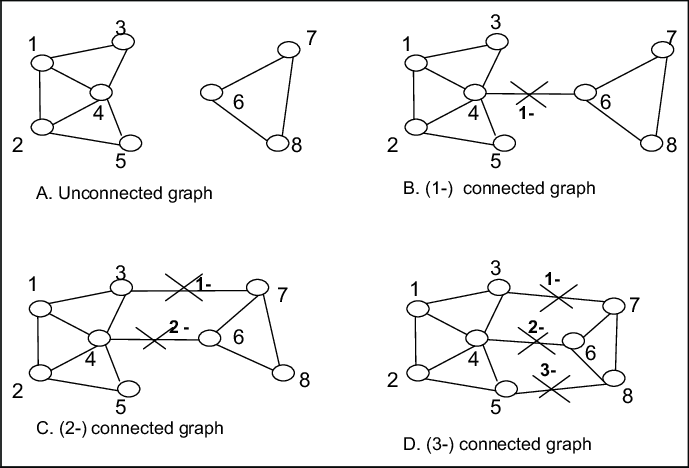

In [7]:
# graph connectivity
path="C:\\Users\\lenovo\\OMDENA TRAINING\\Graph analysis\\images\\graph-connectivity.png"
display(Image.open(path))

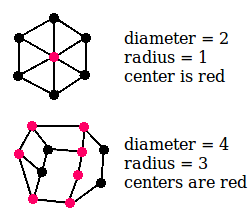

In [8]:
# graph diameter
path="C:\\Users\\lenovo\\OMDENA TRAINING\\Graph analysis\\images\\graph_diameter.png"
display(Image.open(path))

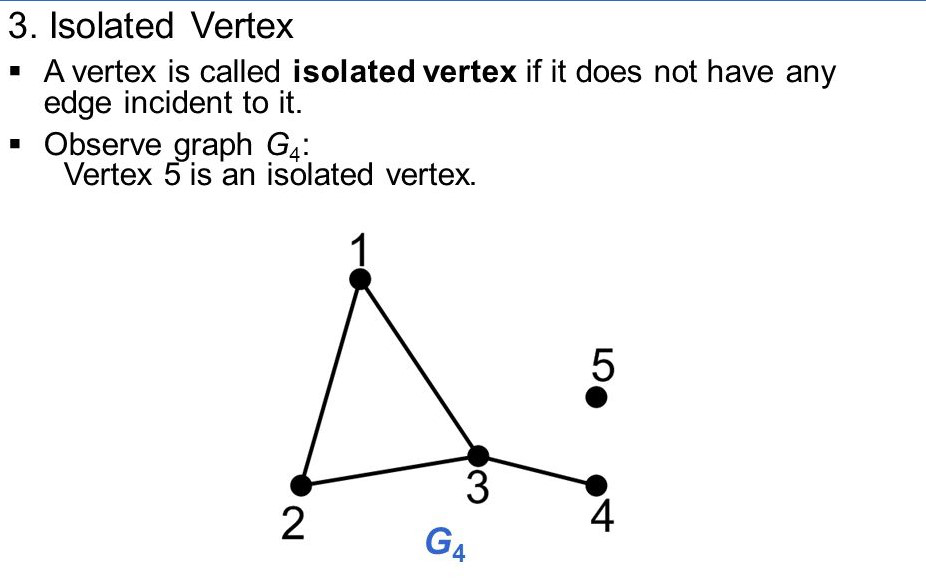

In [14]:
# isolated notes
path="C:\\Users\\lenovo\\OMDENA TRAINING\\Graph analysis\\images\\isolated-node.png"
display(Image.open(path))

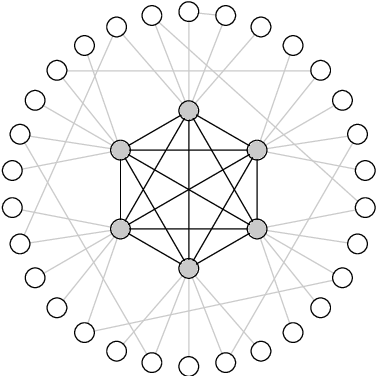

In [15]:
# Core VS Periphery nodes
path="C:\\Users\\lenovo\\OMDENA TRAINING\\Graph analysis\\images\\core-periphery.png"
display(Image.open(path))

Few important characteristics of a Graph –

- **Eccentricity**: For a node n in a graph G, the eccentricity of n is the largest possible shortest path distance between n and all other nodes.
- **Diameter**: The maximum shortest distance between a pair of nodes in a graph G is its Diamater. It is the largest possible eccentricity value of a node.
- **Radius**: It is the minimum eccentricity value of a node.
- **Periphery**: It is the set of nodes that have their eccentricity equal to their Diameter.
- **Center**: Center of a Graph is the set of nodes whose eccentricity is equal to the radius of the Graph.

### Example

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
# Build a directed graph with node attributes
G = nx.DiGraph()
G.add_edge("x", "a", capacity=3.0)
G.add_edge("x", "b", capacity=1.0)
G.add_edge("a", "c", capacity=3.0)
G.add_edge("b", "c", capacity=5.0)
G.add_edge("b", "d", capacity=4.0)
G.add_edge("d", "e", capacity=2.0)
G.add_edge("c", "y", capacity=2.0)
G.add_edge("e", "y", capacity=3.0)

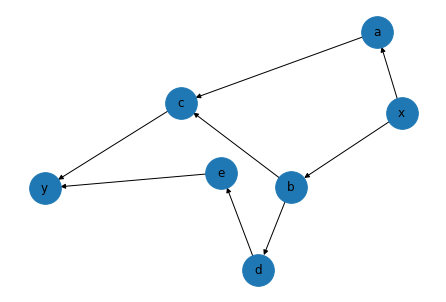

In [5]:
# Draw ego network

from matplotlib.pyplot import figure
pos = nx.spring_layout(G)
nx.draw(G, with_labels = True, node_size=1000)

In [6]:
# convert to undirected()
g = G.to_undirected()
  
print("Eccentricity: ", nx.eccentricity(g))
print("Diameter: ", nx.diameter(g))
print("Radius: ", nx.radius(g))
print("Preiphery: ", list(nx.periphery(g)))
print("Center: ", list(nx.center(g)))

Eccentricity:  {'x': 3, 'a': 3, 'b': 2, 'c': 2, 'd': 3, 'e': 3, 'y': 3}
Diameter:  3
Radius:  2
Preiphery:  ['x', 'a', 'd', 'e', 'y']
Center:  ['b', 'c']


In [7]:
# check directionality
G.is_directed()

True

In [8]:
# Is it strongly connected?
nx.is_strongly_connected(G)

False

For a directed graph: A directed graph is strongly connected if for every pair of nodes u and v, 
there is a directed path from u to v and v to u.

In [9]:
# Is it weakly connected?
nx.is_weakly_connected(G)

True

For a directed graph: It is weakly connected if replacing all the edges of the directed graph,
with undirected edges will produce a Undirected Connected Graph.

In [10]:
# check connectivity
nx.is_connected(g)

True

In [11]:
# returns number of different connected components
print(nx.number_connected_components(g))

1


In [12]:
# returns list of nodes in different connected components
list(list(nx.connected_components(g)))

[{'a', 'b', 'c', 'd', 'e', 'x', 'y'}]

In [13]:
# returns list of nodes of component containing given node 
list(nx.node_connected_component(g, 'a'))

['x', 'd', 'c', 'b', 'e', 'a', 'y']

In [14]:
# returns number of nodes to be removed
# so that Graph becomes disconnected
print(nx.node_connectivity(g))

2


In [15]:
# returns number of edges to be removed
# so that Graph becomes disconnected
print(nx.edge_connectivity(g))

2


In [24]:
# returns dictionary of shortest paths from A to all other nodes
list(nx.shortest_path(G, 'a'))

['a', 'c', 'y']

In [16]:
# returns a shortest path from node A to G
print(nx.shortest_path(g, 'a', 'b'))

['a', 'x', 'b']


In [27]:
# returns length of shortest path from node A to G
print(nx.shortest_path_length(g, 'a', 'b'))

2


In [17]:
# returns list of all paths from node A to J
print(list(nx.all_simple_paths(g, 'a', 'b')))

[['a', 'x', 'b'], ['a', 'c', 'b'], ['a', 'c', 'y', 'e', 'd', 'b']]


In [29]:
# returns average of shortest paths between all possible pairs of nodes
print(nx.average_shortest_path_length(g))

1.8095238095238095


### Connectivity cuts

- minimum_node_cut(G, s=None, t=None, flow_func=None)
- Set of nodes that, if removed, would disconnect G. 
- If source and target nodes are provided, the set contains the nodes that if removed, would destroy all paths between source and target.
- This is a flow based implementation of minimum node cut. The algorithm is based in solving a number of maximum flow computations to determine the capacity of the minimum cut on an auxiliary directed network that corresponds to the minimum node cut of G. It handles both directed and undirected graphs.

In [18]:
# This function returns a set of nodes of minimum cardinality that disconnects G.
node_cut = nx.minimum_node_cut(g)

In [19]:
# check cut nodes
print(len(node_cut))
print(node_cut)

2
{'c', 'x'}


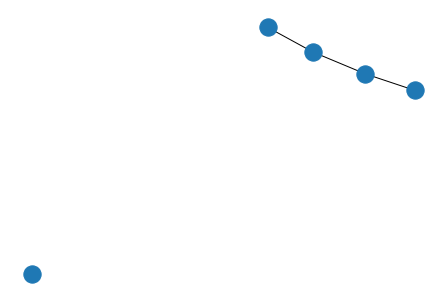

In [20]:
# remove cut nodes from graph
g.remove_nodes_from(node_cut)
nx.draw(g, with_labels=False)
plt.show()

In [21]:
# check if directed
g.is_directed()

False

In [22]:
# Get graph info
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 5
Number of edges: 3
Average degree:   1.2000


In [23]:
# check if connected
nx.is_connected(g)

False